In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import fbeta_score


In [2]:
d_train = pd.read_csv('./train.csv')

In [3]:
d_test = pd.read_csv('./test.csv')

In [4]:
d_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [5]:
d_train.shape

(40455, 11)

In [6]:
d_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
# not nulls yuhuuu

In [8]:
d_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

## Lets see what can we do with the categorical columns

I am going to assume that all the 3 categorical variables are important in a certain order.

This is obvious in the cut (Ideal is the best, therefore a 5 out of 5). With the color, at first I am going to assume the same, the are colors which have more market value than others. The clarity works the same as color.

####  - Cut

In [9]:
d_train.cut.value_counts()

Ideal        16230
Premium      10338
Very Good     9003
Good          3682
Fair          1202
Name: cut, dtype: int64

In [10]:
category = {
    'Ideal' : 5,
    'Premium' : 4,
    'Very Good' : 3,
    'Good' : 2,
    'Fair' : 1   
}

In [11]:
d_train.cut = d_train.cut.map(category)

In [12]:
d_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
38473,38473,0.4,5,E,VS1,61.2,55.0,4.76,4.79,2.92,6.846


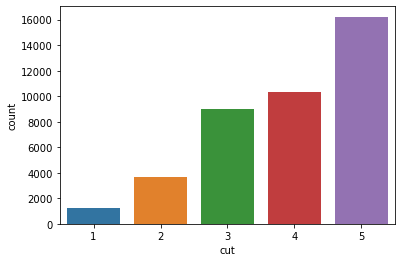

In [13]:
sns.countplot(data=d_train, x=d_train.cut);

#### - Color

In [14]:
d_train.color.value_counts()

G    8410
E    7368
F    7182
H    6203
D    5100
I    4070
J    2122
Name: color, dtype: int64

In [15]:
color_ = {
    'G' : 1,
    'E': 2,
    'F': 3,
    'H': 4,
    'D': 5,
    'I': 6,
    'J': 7
}

In [16]:
d_train.color = d_train.color.map(color_)

In [17]:
d_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
1923,1923,0.71,2,4,VS1,63.6,55.0,5.58,5.65,3.57,7.747


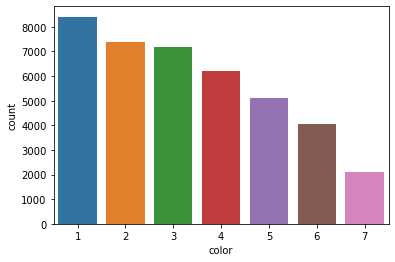

In [18]:
sns.countplot(data=d_train, x=d_train.color);

#### - Clarity

In [19]:
d_train.clarity.value_counts()

SI1     9779
VS2     9259
SI2     6921
VS1     6079
VVS2    3745
VVS1    2807
IF      1312
I1       553
Name: clarity, dtype: int64

In [20]:
calrity_ = {
    'SI2': 1, 
    'VVS2': 2, 
    'VS2': 3, 
    'VS1': 4, 
    'SI1': 5, 
    'VVS1': 6, 
    'IF': 7, 
    'I1': 8
}

In [21]:
d_train.clarity = d_train.clarity.map(calrity_)

In [22]:
d_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
35292,35292,0.31,4,1,4,61.8,59.0,4.32,4.35,2.68,6.438


In [23]:
d_train.dtypes

id           int64
carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [24]:
# DONE

## Now let's see which are the 4c´s of a Diamond

This are, in  order of most valuable to least:
 
- Carat

- Color

- Clarity

- Cut

This are the most important features of a diamond, but we can not ignore other features as table, depth (z)...

In [25]:
correlation = d_train.corr()

In [26]:
correlation

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,-0.003045,-0.000372,0.003901,0.001354,-0.000405,0.000783,-0.002447,-0.001936,-0.001273,-0.003194
carat,-0.003045,1.000000,-0.131069,0.190115,-0.155426,0.023585,0.185478,0.974648,0.944419,0.947469,0.920064
cut,-0.000372,-0.131069,1.000000,-0.035514,0.035271,-0.215352,-0.431195,-0.122895,-0.117832,-0.145396,-0.084878
color,0.003901,0.190115,-0.035514,1.000000,-0.011532,0.025624,0.041443,0.172155,0.166396,0.169746,0.086188
clarity,0.001354,-0.155426,0.035271,-0.011532,1.000000,0.022249,-0.061169,-0.163722,-0.159106,-0.155915,-0.122930
depth,-0.000405,0.023585,-0.215352,0.025624,0.022249,1.000000,-0.299203,-0.029867,-0.033960,0.089474,-0.003292
table,0.000783,0.185478,-0.431195,0.041443,-0.061169,-0.299203,1.000000,0.200374,0.186788,0.153726,0.162804
x,-0.002447,0.974648,-0.122895,0.172155,-0.163722,-0.029867,0.200374,1.000000,0.967315,0.965496,0.957668
y,-0.001936,0.944419,-0.117832,0.166396,-0.159106,-0.033960,0.186788,0.967315,1.000000,0.941176,0.928909
z,-0.001273,0.947469,-0.145396,0.169746,-0.155915,0.089474,0.153726,0.965496,0.941176,1.000000,0.930014


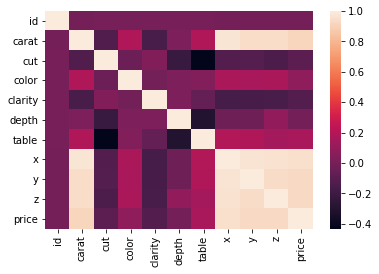

In [27]:
sns.heatmap(correlation);

## Machine Learning time!

In [28]:
# lets start with a decision tree

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X = d_train.drop("price", axis=1)
y = d_train.price

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [118]:
X_train.shape

(32364, 10)

In [119]:
X_test.shape

(8091, 10)

In [120]:
y_train.shape

(32364,)

In [121]:
y_test.shape

(8091,)

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
model_tree_13 = DecisionTreeRegressor(max_depth=13)

In [124]:
model_tree_13.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=13)

In [125]:
y_predict = model_tree_13.predict(X_test).round(3)

In [126]:
y_predict

array([6.646, 8.202, 6.56 , ..., 7.663, 9.21 , 7.781])

In [127]:
from sklearn import metrics

In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
RMSE = (mean_squared_error(y_test, y_predict)) ** 0.5

In [130]:
RMSE

0.12346616022338473

In [45]:
d_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67


In [46]:
d_test.cut = d_test.cut.map(category)
d_test.color = d_test.color.map(color_)
d_test.clarity = d_test.clarity.map(calrity_)

In [47]:
d_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,5,6,5,60.5,58.0,4.43,4.49,2.70
1,1,1.24,4,6,5,62.9,60.0,6.80,6.74,4.26
2,2,1.66,4,5,5,62.0,59.0,7.55,7.60,4.70
3,3,0.75,4,5,1,60.6,56.0,5.94,5.90,3.59
4,4,1.50,1,2,1,64.8,55.0,7.26,7.15,4.67


In [48]:
y_predict_1 = model_tree_13.predict(d_test).round(3)

In [49]:
y_predict_1

array([6.037, 8.354, 9.524, ..., 6.508, 8.842, 7.908])

In [50]:
d_test['price'] = y_predict_1

In [51]:
d_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.32,5,6,5,60.5,58.0,4.43,4.49,2.70,6.037
1,1,1.24,4,6,5,62.9,60.0,6.80,6.74,4.26,8.354
2,2,1.66,4,5,5,62.0,59.0,7.55,7.60,4.70,9.524
3,3,0.75,4,5,1,60.6,56.0,5.94,5.90,3.59,7.925
4,4,1.50,1,2,1,64.8,55.0,7.26,7.15,4.67,8.968


In [53]:
d_up = d_test.drop(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis = 1)

In [54]:
d_up.head()

,id,price
0,0,6.037
1,1,8.354
2,2,9.524
3,3,7.925
4,4,8.968


In [ ]:
d_up.to_csv('upload1.csv', index=False)

In [91]:
# lets do a for loop for obtaining different models and printing them

In [57]:
results = []

for depth in range(1, 21):
    model = DecisionTreeRegressor(max_depth=depth, random_state=666)
    model.fit(X_train, y_train)
    
    result = {
        "model": model,
        "depth": depth,
        "train_RMSE": (mean_squared_error(y_train, model.predict(X_train))) ** 0.5,
        "test_RMSE": (mean_squared_error(y_test, model.predict(X_test))) ** 0.5
    }
    
    results.append(result)

In [59]:
results_df = pd.DataFrame(results)
results_df

,model,depth,train_RMSE,test_RMSE
0,"DecisionTreeRegressor(max_depth=1, random_stat...",1,0.533089,0.535040
1,"DecisionTreeRegressor(max_depth=2, random_stat...",2,0.353706,0.349787
2,"DecisionTreeRegressor(max_depth=3, random_stat...",3,0.273429,0.269817
3,"DecisionTreeRegressor(max_depth=4, random_stat...",4,0.245985,0.246475
4,"DecisionTreeRegressor(max_depth=5, random_stat...",5,0.221688,0.225897
5,"DecisionTreeRegressor(max_depth=6, random_stat...",6,0.200375,0.202485
6,"DecisionTreeRegressor(max_depth=7, random_stat...",7,0.180191,0.184130
7,"DecisionTreeRegressor(max_depth=8, random_stat...",8,0.158507,0.162920
8,"DecisionTreeRegressor(max_depth=9, random_stat...",9,0.141227,0.149220
9,"DecisionTreeRegressor(max_depth=10, random_sta...",10,0.125229,0.137059


In [60]:
# lets plot all of them to check where it starts to fall appart (our model)

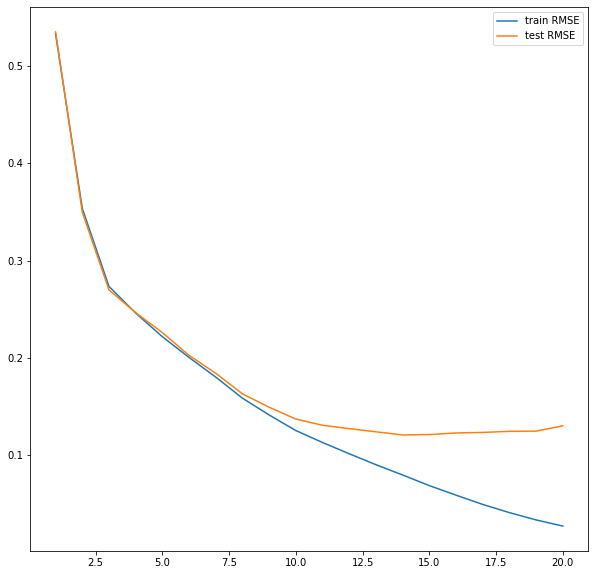

In [65]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_RMSE, label="train RMSE")
plt.plot(results_df.depth, results_df.test_RMSE, label="test RMSE")
plt.legend();

In [66]:
from sklearn.model_selection import GridSearchCV

In [69]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [10, 11, 12, 13, 14],
        "min_samples_split": [30, 50, 100, 120],
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [70]:
%%time
gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............max_depth=10, min_samples_split=30; total time=   0.3s
[CV 2/5] END .............max_depth=10, min_samples_split=30; total time=   0.3s
[CV 3/5] END .............max_depth=10, min_samples_split=30; total time=   0.3s
[CV 4/5] END .............max_depth=10, min_samples_split=30; total time=   0.3s
[CV 5/5] END .............max_depth=10, min_samples_split=30; total time=   0.3s
[CV 1/5] END .............max_depth=10, min_samples_split=50; total time=   0.3s
[CV 2/5] END .............max_depth=10, min_samples_split=50; total time=   0.3s
[CV 3/5] END .............max_depth=10, min_samples_split=50; total time=   0.3s
[CV 4/5] END .............max_depth=10, min_samples_split=50; total time=   0.3s
[CV 5/5] END .............max_depth=10, min_samples_split=50; total time=   0.3s
[CV 1/5] END ............max_depth=10, min_samples_split=100; total time=   0.3s
[CV 2/5] END ............max_depth=10, min_samp

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'min_samples_split': [30, 50, 100, 120]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [85]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [86]:
grid_search_results.sort_values("mean_test_score", ascending=False)
#the RMSE is similar to the one we used here, the MSE, a better MSE will still having better RMSE

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
16,14,30,-0.014961,-0.009314
17,14,50,-0.015413,-0.010940
12,13,30,-0.015704,-0.010427
13,13,50,-0.016110,-0.011825
8,12,30,-0.016508,-0.011881
9,12,50,-0.016987,-0.013026
18,14,100,-0.017030,-0.013885
14,13,100,-0.017497,-0.014458
19,14,120,-0.017736,-0.014851
4,11,30,-0.017763,-0.013771


In [87]:
best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=14, min_samples_split=30)

In [89]:
# its RMSE in the training
(mean_squared_error(best_tree.predict(X_train), y_train)) ** 0.5

0.09624611653160611

In [90]:
# its RMSE in the test
(mean_squared_error(best_tree.predict(X_test), y_test)) ** 0.5

0.11675406905360118

In [94]:
d_test2 = d_test.drop('price', axis = 1)

In [97]:
y_predict_2 = best_tree.predict(d_test2).round(3)

In [101]:
d_test2['price'] = y_predict_2
d_test2.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.32,5,6,5,60.5,58.0,4.43,4.49,2.70,6.108
1,1,1.24,4,6,5,62.9,60.0,6.80,6.74,4.26,8.354
2,2,1.66,4,5,5,62.0,59.0,7.55,7.60,4.70,9.524
3,3,0.75,4,5,1,60.6,56.0,5.94,5.90,3.59,7.900
4,4,1.50,1,2,1,64.8,55.0,7.26,7.15,4.67,8.946


In [102]:
d_up2 = d_test2.drop(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis = 1)

In [104]:
d_up2.to_csv('upload2.csv', index=False)

###  Lets do a random forest

In [136]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, max_features=9)

In [138]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=9)

In [140]:
y_pred_3 = rf.predict(X_test).round(3)

In [141]:
y_pred_3

array([6.605, 8.469, 6.628, ..., 7.676, 9.306, 7.892])

In [143]:
RMSE_rf = (mean_squared_error(y_test, y_pred_3)) ** 0.5
RMSE_rf

0.12239815104227995

In [145]:
d_test3 = d_test.drop('price', axis = 1)

In [146]:
y_pred_4 = rf.predict(d_test3).round(3)

In [147]:
d_test3['price'] = y_pred_4
d_test3.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.32,5,6,5,60.5,58.0,4.43,4.49,2.70,6.165
1,1,1.24,4,6,5,62.9,60.0,6.80,6.74,4.26,8.520
2,2,1.66,4,5,5,62.0,59.0,7.55,7.60,4.70,9.391
3,3,0.75,4,5,1,60.6,56.0,5.94,5.90,3.59,7.860
4,4,1.50,1,2,1,64.8,55.0,7.26,7.15,4.67,8.902


In [148]:
# grid search with a random forest?

In [150]:
gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        "max_depth": [9, 10, 11, 12, 13, 14],
        "n_estimators": [50, 100, 150, 200],
        "max_features": [6, 7, 8, 9, 10], 
        "min_samples_split": [30, 50, 100, 120],
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [167]:
# the fit of this model is at the end of this notebook due to its HUGE scroll (sorry for the incovenience)

In [151]:
%%time
gs.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV 1/5] END max_depth=9, max_features=6, min_samples_split=30, n_estimators=50; total time=   5.1s
[CV 2/5] END max_depth=9, max_features=6, min_samples_split=30, n_estimators=50; total time=   5.2s
[CV 3/5] END max_depth=9, max_features=6, min_samples_split=30, n_estimators=50; total time=   5.1s
[CV 4/5] END max_depth=9, max_features=6, min_samples_split=30, n_estimators=50; total time=   5.0s
[CV 5/5] END max_depth=9, max_features=6, min_samples_split=30, n_estimators=50; total time=   5.2s
[CV 1/5] END max_depth=9, max_features=6, min_samples_split=30, n_estimators=100; total time=  10.4s
[CV 2/5] END max_depth=9, max_features=6, min_samples_split=30, n_estimators=100; total time=  10.3s
[CV 3/5] END max_depth=9, max_features=6, min_samples_split=30, n_estimators=100; total time=  10.2s
[CV 4/5] END max_depth=9, max_features=6, min_samples_split=30, n_estimators=100; total time=  10.3s
[CV 5/5] END max_depth=9, max_fe

[CV 2/5] END max_depth=9, max_features=7, min_samples_split=30, n_estimators=50; total time=   5.7s
[CV 3/5] END max_depth=9, max_features=7, min_samples_split=30, n_estimators=50; total time=   5.8s
[CV 4/5] END max_depth=9, max_features=7, min_samples_split=30, n_estimators=50; total time=   5.5s
[CV 5/5] END max_depth=9, max_features=7, min_samples_split=30, n_estimators=50; total time=   3.8s
[CV 1/5] END max_depth=9, max_features=7, min_samples_split=30, n_estimators=100; total time=   3.4s
[CV 2/5] END max_depth=9, max_features=7, min_samples_split=30, n_estimators=100; total time=   3.3s
[CV 3/5] END max_depth=9, max_features=7, min_samples_split=30, n_estimators=100; total time=   3.3s
[CV 4/5] END max_depth=9, max_features=7, min_samples_split=30, n_estimators=100; total time=   3.6s
[CV 5/5] END max_depth=9, max_features=7, min_samples_split=30, n_estimators=100; total time=   3.4s
[CV 1/5] END max_depth=9, max_features=7, min_samples_split=30, n_estimators=150; total time=  

[CV 3/5] END max_depth=9, max_features=8, min_samples_split=30, n_estimators=50; total time=   1.8s
[CV 4/5] END max_depth=9, max_features=8, min_samples_split=30, n_estimators=50; total time=   1.9s
[CV 5/5] END max_depth=9, max_features=8, min_samples_split=30, n_estimators=50; total time=   2.0s
[CV 1/5] END max_depth=9, max_features=8, min_samples_split=30, n_estimators=100; total time=   3.6s
[CV 2/5] END max_depth=9, max_features=8, min_samples_split=30, n_estimators=100; total time=   3.7s
[CV 3/5] END max_depth=9, max_features=8, min_samples_split=30, n_estimators=100; total time=   3.8s
[CV 4/5] END max_depth=9, max_features=8, min_samples_split=30, n_estimators=100; total time=   3.8s
[CV 5/5] END max_depth=9, max_features=8, min_samples_split=30, n_estimators=100; total time=   3.9s
[CV 1/5] END max_depth=9, max_features=8, min_samples_split=30, n_estimators=150; total time=   5.5s
[CV 2/5] END max_depth=9, max_features=8, min_samples_split=30, n_estimators=150; total time= 

[CV 4/5] END max_depth=9, max_features=9, min_samples_split=30, n_estimators=50; total time=   2.1s
[CV 5/5] END max_depth=9, max_features=9, min_samples_split=30, n_estimators=50; total time=   2.3s
[CV 1/5] END max_depth=9, max_features=9, min_samples_split=30, n_estimators=100; total time=   4.1s
[CV 2/5] END max_depth=9, max_features=9, min_samples_split=30, n_estimators=100; total time=   4.2s
[CV 3/5] END max_depth=9, max_features=9, min_samples_split=30, n_estimators=100; total time=   4.5s
[CV 4/5] END max_depth=9, max_features=9, min_samples_split=30, n_estimators=100; total time=   4.4s
[CV 5/5] END max_depth=9, max_features=9, min_samples_split=30, n_estimators=100; total time=   4.2s
[CV 1/5] END max_depth=9, max_features=9, min_samples_split=30, n_estimators=150; total time=   6.7s
[CV 2/5] END max_depth=9, max_features=9, min_samples_split=30, n_estimators=150; total time=   6.4s
[CV 3/5] END max_depth=9, max_features=9, min_samples_split=30, n_estimators=150; total time=

[CV 5/5] END max_depth=9, max_features=10, min_samples_split=30, n_estimators=50; total time=   2.4s
[CV 1/5] END max_depth=9, max_features=10, min_samples_split=30, n_estimators=100; total time=   4.9s
[CV 2/5] END max_depth=9, max_features=10, min_samples_split=30, n_estimators=100; total time=   4.7s
[CV 3/5] END max_depth=9, max_features=10, min_samples_split=30, n_estimators=100; total time=   5.0s
[CV 4/5] END max_depth=9, max_features=10, min_samples_split=30, n_estimators=100; total time=   4.8s
[CV 5/5] END max_depth=9, max_features=10, min_samples_split=30, n_estimators=100; total time=   5.0s
[CV 1/5] END max_depth=9, max_features=10, min_samples_split=30, n_estimators=150; total time=   7.3s
[CV 2/5] END max_depth=9, max_features=10, min_samples_split=30, n_estimators=150; total time=   7.0s
[CV 3/5] END max_depth=9, max_features=10, min_samples_split=30, n_estimators=150; total time=   7.0s
[CV 4/5] END max_depth=9, max_features=10, min_samples_split=30, n_estimators=150; 

[CV 1/5] END max_depth=10, max_features=6, min_samples_split=30, n_estimators=100; total time=   3.4s
[CV 2/5] END max_depth=10, max_features=6, min_samples_split=30, n_estimators=100; total time=   3.1s
[CV 3/5] END max_depth=10, max_features=6, min_samples_split=30, n_estimators=100; total time=   3.2s
[CV 4/5] END max_depth=10, max_features=6, min_samples_split=30, n_estimators=100; total time=   3.2s
[CV 5/5] END max_depth=10, max_features=6, min_samples_split=30, n_estimators=100; total time=   3.4s
[CV 1/5] END max_depth=10, max_features=6, min_samples_split=30, n_estimators=150; total time=   5.0s
[CV 2/5] END max_depth=10, max_features=6, min_samples_split=30, n_estimators=150; total time=   5.1s
[CV 3/5] END max_depth=10, max_features=6, min_samples_split=30, n_estimators=150; total time=   4.9s
[CV 4/5] END max_depth=10, max_features=6, min_samples_split=30, n_estimators=150; total time=   5.0s
[CV 5/5] END max_depth=10, max_features=6, min_samples_split=30, n_estimators=150;

[CV 2/5] END max_depth=10, max_features=7, min_samples_split=30, n_estimators=100; total time=   4.0s
[CV 3/5] END max_depth=10, max_features=7, min_samples_split=30, n_estimators=100; total time=   3.7s
[CV 4/5] END max_depth=10, max_features=7, min_samples_split=30, n_estimators=100; total time=   3.9s
[CV 5/5] END max_depth=10, max_features=7, min_samples_split=30, n_estimators=100; total time=   3.9s
[CV 1/5] END max_depth=10, max_features=7, min_samples_split=30, n_estimators=150; total time=   5.6s
[CV 2/5] END max_depth=10, max_features=7, min_samples_split=30, n_estimators=150; total time=   5.7s
[CV 3/5] END max_depth=10, max_features=7, min_samples_split=30, n_estimators=150; total time=   5.9s
[CV 4/5] END max_depth=10, max_features=7, min_samples_split=30, n_estimators=150; total time=   5.7s
[CV 5/5] END max_depth=10, max_features=7, min_samples_split=30, n_estimators=150; total time=   5.6s
[CV 1/5] END max_depth=10, max_features=7, min_samples_split=30, n_estimators=200;

[CV 3/5] END max_depth=10, max_features=8, min_samples_split=30, n_estimators=100; total time=   4.0s
[CV 4/5] END max_depth=10, max_features=8, min_samples_split=30, n_estimators=100; total time=   4.3s
[CV 5/5] END max_depth=10, max_features=8, min_samples_split=30, n_estimators=100; total time=   4.1s
[CV 1/5] END max_depth=10, max_features=8, min_samples_split=30, n_estimators=150; total time=   6.4s
[CV 2/5] END max_depth=10, max_features=8, min_samples_split=30, n_estimators=150; total time=   6.3s
[CV 3/5] END max_depth=10, max_features=8, min_samples_split=30, n_estimators=150; total time=   6.2s
[CV 4/5] END max_depth=10, max_features=8, min_samples_split=30, n_estimators=150; total time=   6.3s
[CV 5/5] END max_depth=10, max_features=8, min_samples_split=30, n_estimators=150; total time=   6.3s
[CV 1/5] END max_depth=10, max_features=8, min_samples_split=30, n_estimators=200; total time=   8.5s
[CV 2/5] END max_depth=10, max_features=8, min_samples_split=30, n_estimators=200;

[CV 4/5] END max_depth=10, max_features=9, min_samples_split=30, n_estimators=100; total time=   4.6s
[CV 5/5] END max_depth=10, max_features=9, min_samples_split=30, n_estimators=100; total time=   4.7s
[CV 1/5] END max_depth=10, max_features=9, min_samples_split=30, n_estimators=150; total time=   7.1s
[CV 2/5] END max_depth=10, max_features=9, min_samples_split=30, n_estimators=150; total time=   7.0s
[CV 3/5] END max_depth=10, max_features=9, min_samples_split=30, n_estimators=150; total time=   7.1s
[CV 4/5] END max_depth=10, max_features=9, min_samples_split=30, n_estimators=150; total time=   7.0s
[CV 5/5] END max_depth=10, max_features=9, min_samples_split=30, n_estimators=150; total time=   7.0s
[CV 1/5] END max_depth=10, max_features=9, min_samples_split=30, n_estimators=200; total time=   9.2s
[CV 2/5] END max_depth=10, max_features=9, min_samples_split=30, n_estimators=200; total time=   9.6s
[CV 3/5] END max_depth=10, max_features=9, min_samples_split=30, n_estimators=200;

[CV 5/5] END max_depth=10, max_features=10, min_samples_split=30, n_estimators=100; total time=   5.2s
[CV 1/5] END max_depth=10, max_features=10, min_samples_split=30, n_estimators=150; total time=   7.7s
[CV 2/5] END max_depth=10, max_features=10, min_samples_split=30, n_estimators=150; total time=   7.8s
[CV 3/5] END max_depth=10, max_features=10, min_samples_split=30, n_estimators=150; total time=   7.8s
[CV 4/5] END max_depth=10, max_features=10, min_samples_split=30, n_estimators=150; total time=   7.5s
[CV 5/5] END max_depth=10, max_features=10, min_samples_split=30, n_estimators=150; total time=   7.5s
[CV 1/5] END max_depth=10, max_features=10, min_samples_split=30, n_estimators=200; total time=  10.3s
[CV 2/5] END max_depth=10, max_features=10, min_samples_split=30, n_estimators=200; total time=  10.3s
[CV 3/5] END max_depth=10, max_features=10, min_samples_split=30, n_estimators=200; total time=  10.2s
[CV 4/5] END max_depth=10, max_features=10, min_samples_split=30, n_estim

[CV 5/5] END max_depth=11, max_features=6, min_samples_split=30, n_estimators=100; total time=   4.8s
[CV 1/5] END max_depth=11, max_features=6, min_samples_split=30, n_estimators=150; total time=   7.0s
[CV 2/5] END max_depth=11, max_features=6, min_samples_split=30, n_estimators=150; total time=   6.5s
[CV 3/5] END max_depth=11, max_features=6, min_samples_split=30, n_estimators=150; total time=   6.6s
[CV 4/5] END max_depth=11, max_features=6, min_samples_split=30, n_estimators=150; total time=   6.6s
[CV 5/5] END max_depth=11, max_features=6, min_samples_split=30, n_estimators=150; total time=   6.2s
[CV 1/5] END max_depth=11, max_features=6, min_samples_split=30, n_estimators=200; total time=   8.6s
[CV 2/5] END max_depth=11, max_features=6, min_samples_split=30, n_estimators=200; total time=   8.5s
[CV 3/5] END max_depth=11, max_features=6, min_samples_split=30, n_estimators=200; total time=   8.5s
[CV 4/5] END max_depth=11, max_features=6, min_samples_split=30, n_estimators=200;

[CV 1/5] END max_depth=11, max_features=7, min_samples_split=30, n_estimators=150; total time=   5.8s
[CV 2/5] END max_depth=11, max_features=7, min_samples_split=30, n_estimators=150; total time=   5.4s
[CV 3/5] END max_depth=11, max_features=7, min_samples_split=30, n_estimators=150; total time=   5.2s
[CV 1/5] END max_depth=11, max_features=7, min_samples_split=30, n_estimators=200; total time=   7.7s
[CV 2/5] END max_depth=11, max_features=7, min_samples_split=30, n_estimators=200; total time=   7.6s
[CV 3/5] END max_depth=11, max_features=7, min_samples_split=30, n_estimators=200; total time=   7.3s
[CV 4/5] END max_depth=11, max_features=7, min_samples_split=30, n_estimators=200; total time=   7.7s
[CV 5/5] END max_depth=11, max_features=7, min_samples_split=30, n_estimators=200; total time=   7.7s
[CV 1/5] END max_depth=11, max_features=7, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV 2/5] END max_depth=11, max_features=7, min_samples_split=50, n_estimators=50; t

[CV 4/5] END max_depth=11, max_features=8, min_samples_split=30, n_estimators=150; total time=   6.4s
[CV 5/5] END max_depth=11, max_features=8, min_samples_split=30, n_estimators=150; total time=   6.4s
[CV 1/5] END max_depth=11, max_features=8, min_samples_split=30, n_estimators=200; total time=   8.5s
[CV 2/5] END max_depth=11, max_features=8, min_samples_split=30, n_estimators=200; total time=   8.4s
[CV 3/5] END max_depth=11, max_features=8, min_samples_split=30, n_estimators=200; total time=   7.7s
[CV 4/5] END max_depth=11, max_features=8, min_samples_split=30, n_estimators=200; total time=   7.9s
[CV 5/5] END max_depth=11, max_features=8, min_samples_split=30, n_estimators=200; total time=   8.7s
[CV 1/5] END max_depth=11, max_features=8, min_samples_split=50, n_estimators=50; total time=   2.1s
[CV 2/5] END max_depth=11, max_features=8, min_samples_split=50, n_estimators=50; total time=   2.1s
[CV 3/5] END max_depth=11, max_features=8, min_samples_split=50, n_estimators=50; to

[CV 5/5] END max_depth=11, max_features=9, min_samples_split=30, n_estimators=150; total time=   7.6s
[CV 1/5] END max_depth=11, max_features=9, min_samples_split=30, n_estimators=200; total time=   9.8s
[CV 2/5] END max_depth=11, max_features=9, min_samples_split=30, n_estimators=200; total time=   9.9s
[CV 3/5] END max_depth=11, max_features=9, min_samples_split=30, n_estimators=200; total time=   9.7s
[CV 4/5] END max_depth=11, max_features=9, min_samples_split=30, n_estimators=200; total time=   9.8s
[CV 5/5] END max_depth=11, max_features=9, min_samples_split=30, n_estimators=200; total time=   9.8s
[CV 1/5] END max_depth=11, max_features=9, min_samples_split=50, n_estimators=50; total time=   2.4s
[CV 2/5] END max_depth=11, max_features=9, min_samples_split=50, n_estimators=50; total time=   2.3s
[CV 3/5] END max_depth=11, max_features=9, min_samples_split=50, n_estimators=50; total time=   2.4s
[CV 4/5] END max_depth=11, max_features=9, min_samples_split=50, n_estimators=50; tot

[CV 5/5] END max_depth=11, max_features=10, min_samples_split=30, n_estimators=150; total time=   8.1s
[CV 1/5] END max_depth=11, max_features=10, min_samples_split=30, n_estimators=200; total time=  11.0s
[CV 2/5] END max_depth=11, max_features=10, min_samples_split=30, n_estimators=200; total time=  11.1s
[CV 3/5] END max_depth=11, max_features=10, min_samples_split=30, n_estimators=200; total time=  10.7s
[CV 4/5] END max_depth=11, max_features=10, min_samples_split=30, n_estimators=200; total time=  10.8s
[CV 5/5] END max_depth=11, max_features=10, min_samples_split=30, n_estimators=200; total time=  10.6s
[CV 1/5] END max_depth=11, max_features=10, min_samples_split=50, n_estimators=50; total time=   2.6s
[CV 2/5] END max_depth=11, max_features=10, min_samples_split=50, n_estimators=50; total time=   2.7s
[CV 3/5] END max_depth=11, max_features=10, min_samples_split=50, n_estimators=50; total time=   2.7s
[CV 4/5] END max_depth=11, max_features=10, min_samples_split=50, n_estimato

[CV 5/5] END max_depth=12, max_features=6, min_samples_split=30, n_estimators=150; total time=   5.5s
[CV 1/5] END max_depth=12, max_features=6, min_samples_split=30, n_estimators=200; total time=   7.1s
[CV 2/5] END max_depth=12, max_features=6, min_samples_split=30, n_estimators=200; total time=   7.1s
[CV 3/5] END max_depth=12, max_features=6, min_samples_split=30, n_estimators=200; total time=   7.1s
[CV 4/5] END max_depth=12, max_features=6, min_samples_split=30, n_estimators=200; total time=   7.0s
[CV 5/5] END max_depth=12, max_features=6, min_samples_split=30, n_estimators=200; total time=   7.2s
[CV 1/5] END max_depth=12, max_features=6, min_samples_split=50, n_estimators=50; total time=   1.7s
[CV 2/5] END max_depth=12, max_features=6, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV 3/5] END max_depth=12, max_features=6, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV 4/5] END max_depth=12, max_features=6, min_samples_split=50, n_estimators=50; tot

[CV 1/5] END max_depth=12, max_features=7, min_samples_split=30, n_estimators=200; total time=   8.7s
[CV 2/5] END max_depth=12, max_features=7, min_samples_split=30, n_estimators=200; total time=   8.4s
[CV 3/5] END max_depth=12, max_features=7, min_samples_split=30, n_estimators=200; total time=   8.4s
[CV 4/5] END max_depth=12, max_features=7, min_samples_split=30, n_estimators=200; total time=   8.4s
[CV 5/5] END max_depth=12, max_features=7, min_samples_split=30, n_estimators=200; total time=  24.3s
[CV 1/5] END max_depth=12, max_features=7, min_samples_split=50, n_estimators=50; total time=   7.0s
[CV 2/5] END max_depth=12, max_features=7, min_samples_split=50, n_estimators=50; total time=   7.0s
[CV 3/5] END max_depth=12, max_features=7, min_samples_split=50, n_estimators=50; total time=   4.9s
[CV 4/5] END max_depth=12, max_features=7, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV 5/5] END max_depth=12, max_features=7, min_samples_split=50, n_estimators=50; tota

[CV 2/5] END max_depth=12, max_features=8, min_samples_split=30, n_estimators=200; total time=   9.9s
[CV 3/5] END max_depth=12, max_features=8, min_samples_split=30, n_estimators=200; total time=   9.7s
[CV 4/5] END max_depth=12, max_features=8, min_samples_split=30, n_estimators=200; total time=   9.7s
[CV 5/5] END max_depth=12, max_features=8, min_samples_split=30, n_estimators=200; total time=   9.1s
[CV 1/5] END max_depth=12, max_features=8, min_samples_split=50, n_estimators=50; total time=   2.2s
[CV 2/5] END max_depth=12, max_features=8, min_samples_split=50, n_estimators=50; total time=   2.3s
[CV 3/5] END max_depth=12, max_features=8, min_samples_split=50, n_estimators=50; total time=   2.2s
[CV 4/5] END max_depth=12, max_features=8, min_samples_split=50, n_estimators=50; total time=   2.3s
[CV 5/5] END max_depth=12, max_features=8, min_samples_split=50, n_estimators=50; total time=   2.2s
[CV 1/5] END max_depth=12, max_features=8, min_samples_split=50, n_estimators=100; tota

[CV 3/5] END max_depth=12, max_features=9, min_samples_split=30, n_estimators=200; total time=  10.1s
[CV 4/5] END max_depth=12, max_features=9, min_samples_split=30, n_estimators=200; total time=  10.4s
[CV 5/5] END max_depth=12, max_features=9, min_samples_split=30, n_estimators=200; total time=  10.4s
[CV 1/5] END max_depth=12, max_features=9, min_samples_split=50, n_estimators=50; total time=   2.5s
[CV 2/5] END max_depth=12, max_features=9, min_samples_split=50, n_estimators=50; total time=   2.4s
[CV 3/5] END max_depth=12, max_features=9, min_samples_split=50, n_estimators=50; total time=   2.4s
[CV 4/5] END max_depth=12, max_features=9, min_samples_split=50, n_estimators=50; total time=   2.5s
[CV 5/5] END max_depth=12, max_features=9, min_samples_split=50, n_estimators=50; total time=   2.5s
[CV 1/5] END max_depth=12, max_features=9, min_samples_split=50, n_estimators=100; total time=   5.0s
[CV 2/5] END max_depth=12, max_features=9, min_samples_split=50, n_estimators=100; tota

[CV 3/5] END max_depth=12, max_features=10, min_samples_split=30, n_estimators=200; total time=  11.4s
[CV 4/5] END max_depth=12, max_features=10, min_samples_split=30, n_estimators=200; total time=  10.6s
[CV 5/5] END max_depth=12, max_features=10, min_samples_split=30, n_estimators=200; total time=  11.4s
[CV 1/5] END max_depth=12, max_features=10, min_samples_split=50, n_estimators=50; total time=   2.7s
[CV 2/5] END max_depth=12, max_features=10, min_samples_split=50, n_estimators=50; total time=   2.7s
[CV 3/5] END max_depth=12, max_features=10, min_samples_split=50, n_estimators=50; total time=   2.4s
[CV 4/5] END max_depth=12, max_features=10, min_samples_split=50, n_estimators=50; total time=   2.6s
[CV 5/5] END max_depth=12, max_features=10, min_samples_split=50, n_estimators=50; total time=   2.7s
[CV 1/5] END max_depth=12, max_features=10, min_samples_split=50, n_estimators=100; total time=   4.9s
[CV 2/5] END max_depth=12, max_features=10, min_samples_split=50, n_estimators

[CV 5/5] END max_depth=13, max_features=6, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV 1/5] END max_depth=13, max_features=6, min_samples_split=50, n_estimators=100; total time=   3.6s
[CV 2/5] END max_depth=13, max_features=6, min_samples_split=50, n_estimators=100; total time=   3.8s
[CV 3/5] END max_depth=13, max_features=6, min_samples_split=50, n_estimators=100; total time=   3.5s
[CV 4/5] END max_depth=13, max_features=6, min_samples_split=50, n_estimators=100; total time=   3.6s
[CV 5/5] END max_depth=13, max_features=6, min_samples_split=50, n_estimators=100; total time=   3.6s
[CV 1/5] END max_depth=13, max_features=6, min_samples_split=50, n_estimators=150; total time=   5.5s
[CV 2/5] END max_depth=13, max_features=6, min_samples_split=50, n_estimators=150; total time=   5.5s
[CV 3/5] END max_depth=13, max_features=6, min_samples_split=50, n_estimators=150; total time=   5.4s
[CV 4/5] END max_depth=13, max_features=6, min_samples_split=50, n_estimators=150; 

[CV 3/5] END max_depth=13, max_features=7, min_samples_split=50, n_estimators=100; total time=   3.6s
[CV 4/5] END max_depth=13, max_features=7, min_samples_split=50, n_estimators=100; total time=   3.7s
[CV 5/5] END max_depth=13, max_features=7, min_samples_split=50, n_estimators=100; total time=   3.8s
[CV 1/5] END max_depth=13, max_features=7, min_samples_split=50, n_estimators=150; total time=   6.3s
[CV 2/5] END max_depth=13, max_features=7, min_samples_split=50, n_estimators=150; total time=   6.3s
[CV 3/5] END max_depth=13, max_features=7, min_samples_split=50, n_estimators=150; total time=   6.2s
[CV 4/5] END max_depth=13, max_features=7, min_samples_split=50, n_estimators=150; total time=   6.0s
[CV 5/5] END max_depth=13, max_features=7, min_samples_split=50, n_estimators=150; total time=   5.5s
[CV 1/5] END max_depth=13, max_features=7, min_samples_split=50, n_estimators=200; total time=   7.5s
[CV 2/5] END max_depth=13, max_features=7, min_samples_split=50, n_estimators=200;

[CV 4/5] END max_depth=13, max_features=8, min_samples_split=50, n_estimators=100; total time=   4.6s
[CV 5/5] END max_depth=13, max_features=8, min_samples_split=50, n_estimators=100; total time=   4.6s
[CV 1/5] END max_depth=13, max_features=8, min_samples_split=50, n_estimators=150; total time=   6.8s
[CV 2/5] END max_depth=13, max_features=8, min_samples_split=50, n_estimators=150; total time=   6.2s
[CV 3/5] END max_depth=13, max_features=8, min_samples_split=50, n_estimators=150; total time=   6.3s
[CV 4/5] END max_depth=13, max_features=8, min_samples_split=50, n_estimators=150; total time=   7.1s
[CV 5/5] END max_depth=13, max_features=8, min_samples_split=50, n_estimators=150; total time=   7.0s
[CV 1/5] END max_depth=13, max_features=8, min_samples_split=50, n_estimators=200; total time=   8.5s
[CV 2/5] END max_depth=13, max_features=8, min_samples_split=50, n_estimators=200; total time=   9.0s
[CV 3/5] END max_depth=13, max_features=8, min_samples_split=50, n_estimators=200;

[CV 5/5] END max_depth=13, max_features=9, min_samples_split=50, n_estimators=100; total time=   4.6s
[CV 1/5] END max_depth=13, max_features=9, min_samples_split=50, n_estimators=150; total time=   6.9s
[CV 2/5] END max_depth=13, max_features=9, min_samples_split=50, n_estimators=150; total time=   7.7s
[CV 3/5] END max_depth=13, max_features=9, min_samples_split=50, n_estimators=150; total time=   7.3s
[CV 4/5] END max_depth=13, max_features=9, min_samples_split=50, n_estimators=150; total time=   7.7s
[CV 5/5] END max_depth=13, max_features=9, min_samples_split=50, n_estimators=150; total time=   7.6s
[CV 1/5] END max_depth=13, max_features=9, min_samples_split=50, n_estimators=200; total time=  10.0s
[CV 2/5] END max_depth=13, max_features=9, min_samples_split=50, n_estimators=200; total time=  10.3s
[CV 3/5] END max_depth=13, max_features=9, min_samples_split=50, n_estimators=200; total time=  10.1s
[CV 4/5] END max_depth=13, max_features=9, min_samples_split=50, n_estimators=200;

[CV 5/5] END max_depth=13, max_features=10, min_samples_split=50, n_estimators=100; total time=   5.7s
[CV 1/5] END max_depth=13, max_features=10, min_samples_split=50, n_estimators=150; total time=   8.4s
[CV 2/5] END max_depth=13, max_features=10, min_samples_split=50, n_estimators=150; total time=   8.5s
[CV 3/5] END max_depth=13, max_features=10, min_samples_split=50, n_estimators=150; total time=   7.7s
[CV 4/5] END max_depth=13, max_features=10, min_samples_split=50, n_estimators=150; total time=   8.4s
[CV 5/5] END max_depth=13, max_features=10, min_samples_split=50, n_estimators=150; total time=   7.7s
[CV 1/5] END max_depth=13, max_features=10, min_samples_split=50, n_estimators=200; total time=  11.4s
[CV 2/5] END max_depth=13, max_features=10, min_samples_split=50, n_estimators=200; total time=  11.2s
[CV 3/5] END max_depth=13, max_features=10, min_samples_split=50, n_estimators=200; total time=  11.2s
[CV 4/5] END max_depth=13, max_features=10, min_samples_split=50, n_estim

[CV 5/5] END max_depth=14, max_features=6, min_samples_split=50, n_estimators=100; total time=   3.8s
[CV 1/5] END max_depth=14, max_features=6, min_samples_split=50, n_estimators=150; total time=   5.7s
[CV 2/5] END max_depth=14, max_features=6, min_samples_split=50, n_estimators=150; total time=   5.3s
[CV 3/5] END max_depth=14, max_features=6, min_samples_split=50, n_estimators=150; total time=   5.5s
[CV 4/5] END max_depth=14, max_features=6, min_samples_split=50, n_estimators=150; total time=   5.5s
[CV 5/5] END max_depth=14, max_features=6, min_samples_split=50, n_estimators=150; total time=   5.4s
[CV 1/5] END max_depth=14, max_features=6, min_samples_split=50, n_estimators=200; total time=   7.1s
[CV 2/5] END max_depth=14, max_features=6, min_samples_split=50, n_estimators=200; total time=   7.0s
[CV 3/5] END max_depth=14, max_features=6, min_samples_split=50, n_estimators=200; total time=   7.2s
[CV 4/5] END max_depth=14, max_features=6, min_samples_split=50, n_estimators=200;

[CV 3/5] END max_depth=14, max_features=7, min_samples_split=50, n_estimators=150; total time=  14.3s
[CV 4/5] END max_depth=14, max_features=7, min_samples_split=50, n_estimators=150; total time=  14.3s
[CV 5/5] END max_depth=14, max_features=7, min_samples_split=50, n_estimators=150; total time=  14.3s
[CV 1/5] END max_depth=14, max_features=7, min_samples_split=50, n_estimators=200; total time=  19.0s
[CV 2/5] END max_depth=14, max_features=7, min_samples_split=50, n_estimators=200; total time=  19.1s
[CV 3/5] END max_depth=14, max_features=7, min_samples_split=50, n_estimators=200; total time=  17.2s
[CV 4/5] END max_depth=14, max_features=7, min_samples_split=50, n_estimators=200; total time=  23.7s
[CV 5/5] END max_depth=14, max_features=7, min_samples_split=50, n_estimators=200; total time=  29.1s
[CV 1/5] END max_depth=14, max_features=7, min_samples_split=100, n_estimators=50; total time=   6.6s
[CV 2/5] END max_depth=14, max_features=7, min_samples_split=100, n_estimators=50;

[CV 4/5] END max_depth=14, max_features=8, min_samples_split=50, n_estimators=150; total time=  24.7s
[CV 5/5] END max_depth=14, max_features=8, min_samples_split=50, n_estimators=150; total time=  25.1s
[CV 1/5] END max_depth=14, max_features=8, min_samples_split=50, n_estimators=200; total time=  32.9s
[CV 2/5] END max_depth=14, max_features=8, min_samples_split=50, n_estimators=200; total time=  33.4s
[CV 3/5] END max_depth=14, max_features=8, min_samples_split=50, n_estimators=200; total time=  34.7s
[CV 4/5] END max_depth=14, max_features=8, min_samples_split=50, n_estimators=200; total time=  34.8s
[CV 5/5] END max_depth=14, max_features=8, min_samples_split=50, n_estimators=200; total time=  34.7s
[CV 1/5] END max_depth=14, max_features=8, min_samples_split=100, n_estimators=50; total time=   7.7s
[CV 2/5] END max_depth=14, max_features=8, min_samples_split=100, n_estimators=50; total time=   7.6s
[CV 3/5] END max_depth=14, max_features=8, min_samples_split=100, n_estimators=50;

[CV 5/5] END max_depth=14, max_features=9, min_samples_split=50, n_estimators=150; total time=  28.3s
[CV 1/5] END max_depth=14, max_features=9, min_samples_split=50, n_estimators=200; total time=  37.4s
[CV 2/5] END max_depth=14, max_features=9, min_samples_split=50, n_estimators=200; total time=  37.8s
[CV 3/5] END max_depth=14, max_features=9, min_samples_split=50, n_estimators=200; total time=  37.7s
[CV 4/5] END max_depth=14, max_features=9, min_samples_split=50, n_estimators=200; total time=  39.1s
[CV 5/5] END max_depth=14, max_features=9, min_samples_split=50, n_estimators=200; total time=  39.0s
[CV 1/5] END max_depth=14, max_features=9, min_samples_split=100, n_estimators=50; total time=   8.6s
[CV 2/5] END max_depth=14, max_features=9, min_samples_split=100, n_estimators=50; total time=   8.6s
[CV 3/5] END max_depth=14, max_features=9, min_samples_split=100, n_estimators=50; total time=   8.6s
[CV 4/5] END max_depth=14, max_features=9, min_samples_split=100, n_estimators=50;

[CV 5/5] END max_depth=14, max_features=10, min_samples_split=50, n_estimators=150; total time=  19.8s
[CV 1/5] END max_depth=14, max_features=10, min_samples_split=50, n_estimators=200; total time=  26.3s
[CV 2/5] END max_depth=14, max_features=10, min_samples_split=50, n_estimators=200; total time=  26.5s
[CV 3/5] END max_depth=14, max_features=10, min_samples_split=50, n_estimators=200; total time=  26.3s
[CV 4/5] END max_depth=14, max_features=10, min_samples_split=50, n_estimators=200; total time=  26.5s
[CV 5/5] END max_depth=14, max_features=10, min_samples_split=50, n_estimators=200; total time=  26.5s
[CV 1/5] END max_depth=14, max_features=10, min_samples_split=100, n_estimators=50; total time=   6.0s
[CV 2/5] END max_depth=14, max_features=10, min_samples_split=100, n_estimators=50; total time=   6.0s
[CV 3/5] END max_depth=14, max_features=10, min_samples_split=100, n_estimators=50; total time=   6.0s
[CV 4/5] END max_depth=14, max_features=10, min_samples_split=100, n_esti

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 10, 11, 12, 13, 14],
                         'max_features': [6, 7, 8, 9, 10],
                         'min_samples_split': [30, 50, 100, 120],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [152]:
best_forest = gs.best_estimator_
best_forest

RandomForestRegressor(max_depth=14, max_features=9, min_samples_split=30,
                      n_estimators=150)

In [153]:
# RMSE in the training
(mean_squared_error(best_forest.predict(X_train), y_train)) ** 0.5

0.08885131073726121

In [187]:
# RMSE in the test
(mean_squared_error(best_forest.predict(X_test), y_test)) ** 0.5

0.10172704216292572

In [156]:
y_pred5 = best_forest.predict(X_test).round(3)

In [157]:
RMSE_brf = (mean_squared_error(y_test, y_pred5)) ** 0.5
RMSE_brf

0.10172960238292861

In [158]:
d_test4 = d_test.drop('price', axis = 1)

In [164]:
y_pred6 = best_forest.predict(d_test4).round(4)

In [165]:
d_test4['price'] = y_pred6
d_test4.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.32,5,6,5,60.5,58.0,4.43,4.49,2.70,6.1435
1,1,1.24,4,6,5,62.9,60.0,6.80,6.74,4.26,8.5515
2,2,1.66,4,5,5,62.0,59.0,7.55,7.60,4.70,9.4283
3,3,0.75,4,5,1,60.6,56.0,5.94,5.90,3.59,7.8598
4,4,1.50,1,2,1,64.8,55.0,7.26,7.15,4.67,8.8881


In [166]:
d_up3 = d_test3.drop(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis = 1)
d_up3.to_csv('upload3.csv', index=False)

### Gradient Boosting

In [171]:
gb = GradientBoostingRegressor(n_estimators=400, max_depth=8, max_features=9)
gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=8, max_features=9, n_estimators=400)

In [174]:
y_pred10 = gb.predict(X_test).round(3)

In [175]:
RMSE_gb = (mean_squared_error(y_test, y_pred10)) ** 0.5
RMSE_gb

0.0872115908270744

In [178]:
d_test5 = d_test.drop('price', axis = 1)
y_pred11 = gb.predict(d_test5).round(3)

In [179]:
d_test5['price'] = y_pred11
d_up4 = d_test3.drop(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis = 1)
d_up4.to_csv('upload4.csv', index=False)

In [183]:
'''
gs2 = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid={
        "max_depth": [11, 12, 13, 14],
        "n_estimators": [100, 150, 200],
        "max_features": [8, 9, 10], 
        "min_samples_split": [30, 50, 100],
    },
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True
)
'''

'\ngs2 = GridSearchCV(\n    estimator=GradientBoostingRegressor(),\n    param_grid={\n        "max_depth": [11, 12, 13, 14],\n        "n_estimators": [100, 150, 200],\n        "max_features": [8, 9, 10], \n        "min_samples_split": [30, 50, 100],\n    },\n    cv=5,\n    scoring="neg_mean_squared_error",\n    return_train_score=True\n)\n'

In [188]:
gb2 = GradientBoostingRegressor(n_estimators=300, max_depth=12, max_features=7, min_samples_split = 30)
gb2.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=12, max_features=7, min_samples_split=30,
                          n_estimators=300)

In [189]:
y_pred20 = gb2.predict(X_test).round(3)
RMSE_gb2 = (mean_squared_error(y_test, y_pred20)) ** 0.5
RMSE_gb2

0.08904750023573149

In [190]:
d_test6 = d_test.drop('price', axis = 1)
y_pred21 = gb.predict(d_test6).round(3)
d_test6['price'] = y_pred21
d_up5 = d_test6.drop(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis = 1)
d_up5.to_csv('upload5.csv', index=False)